Bead plots

In [35]:
import pandas as pd
import numpy as np
excel = pd.read_excel('../../OPT Shared files/2_Saved reconstructions/fd_focal scan/bead profiles.xlsx')
excel.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Bead x,81.0,NaN,NaN,NaN,236.0,NaN,NaN,NaN,411.0,...,NaN,NaN,505.0,NaN,NaN,NaN,332.0,NaN,NaN,NaN
1,Bead y,691.0,NaN,NaN,NaN,618.0,NaN,NaN,NaN,348.0,...,NaN,NaN,509.0,NaN,NaN,NaN,904.0,NaN,NaN,NaN
2,Slice,4.0,NaN,NaN,NaN,597.0,NaN,NaN,NaN,595.0,...,NaN,NaN,1291.0,NaN,NaN,NaN,466.0,NaN,NaN,NaN
3,NaN,0.0,1.5000,0.0,0.0,0.0,38.000,0.0,0.0,0.0,...,0.0,0.0,0.0,42.917,0.0,7.778,0.0,12.750,0.0,0.0
4,NaN,1.0,1.8738,1.0,0.0,1.0,65.091,1.0,0.0,1.0,...,1.0,0.0,1.0,49.038,1.0,12.121,1.0,4.661,1.0,0.0


# Bead visualisation

Rotate image based on 

$$\theta = \arctan(\frac{y-c}{x-c})$$

where $c$ is the central coordinate.

In [19]:
image_size = 1038
c = image_size //2
e = 6.45/1000 # pixel_size in mm

# extract 
x = excel.iloc[0].dropna().values[1:].astype(np.float64)
y = 2*c - excel.iloc[1].dropna().values[1:].astype(np.float64)
slice = excel.iloc[2].dropna().values[1:].astype(np.int16)

angles = np.arctan2((y-c), (x-c))*180/np.pi
r = np.sqrt((x-c)**2 + (y-c)**2)*e
print(r)

[3.03512082 1.93381714 1.3045115  1.05231903 0.47890979 0.53538885
 1.97740632 2.75770502 1.33029589 0.86699133 2.93925446 0.11097
 2.76067535]


In [28]:
len(slice)

13

In [25]:
selected = [2,  4,6, -1, -2, -3]

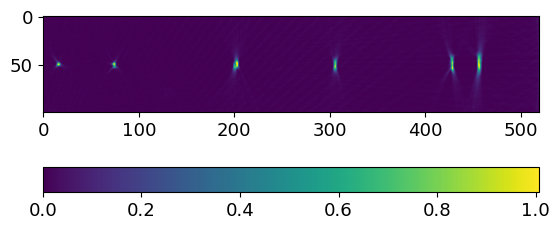

In [26]:
from skimage import io
from skimage.transform import rotate
import matplotlib.pyplot as plt
padded_slice = [str(x).zfill(4) for x in slice]
dy = 50

final_image = np.zeros((image_size, image_size))
for i in selected:
    im = io.imread(f'../../OPT Shared files/2_Saved reconstructions/fd_focal scan/fd_infocus/reco{padded_slice[i]}.tif')
    rotated_image = rotate(im, -angles[i])
    final_image += rotated_image/ np.max(rotated_image[c-dy:c+dy, c:])


plt.imshow(final_image[c-dy:c+dy:, c: ])
plt.colorbar(location='bottom')

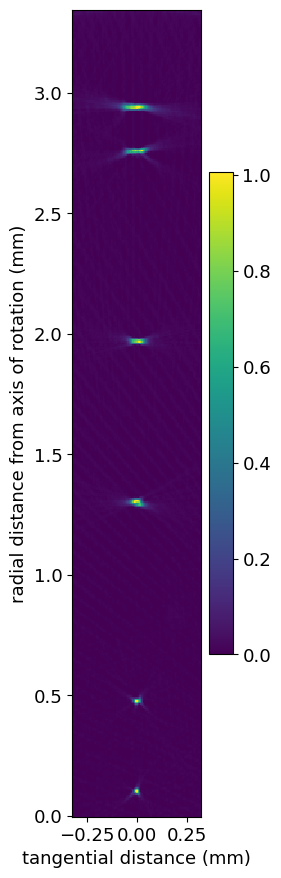

In [27]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(3,9))
x_grid = (np.arange(c, image_size) - c)*e
y_grid = np.arange(-dy, dy)*e
plt.pcolormesh(y_grid, x_grid, final_image[c-dy:c+dy:, c: ].T)
plt.ylabel('radial distance from axis of rotation (mm)')
plt.xlabel('tangential distance (mm)')
plt.colorbar(location='right')
plt.tight_layout()

# Bead profiles

Text(0.5, 0, 'length ($\\mu$m)')

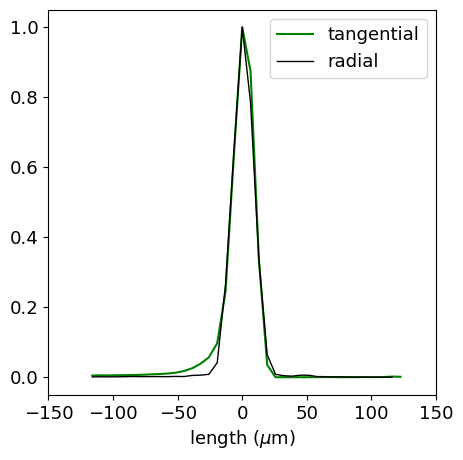

In [79]:
def range_from_profile(array):
    return (np.arange(0,len(array))-np.argmax(array)) * e*1000
plt.figure(figsize=(5,5))
small_tangential = excel.iloc[:,4*11+2].dropna()
plt.plot(range_from_profile(small_tangential),  small_tangential/small_tangential.max(), 'g-', label='tangential', )
small_radial = excel.iloc[:,4*11+4].dropna()
plt.plot(range_from_profile(small_radial), small_radial/small_radial.max(), color='black', lw=1, label = 'radial')
plt.legend()
plt.xlim(-150, 150)
plt.xlabel('length ($\mu$m)')

Text(0.5, 0, 'length ($\\mu$m)')

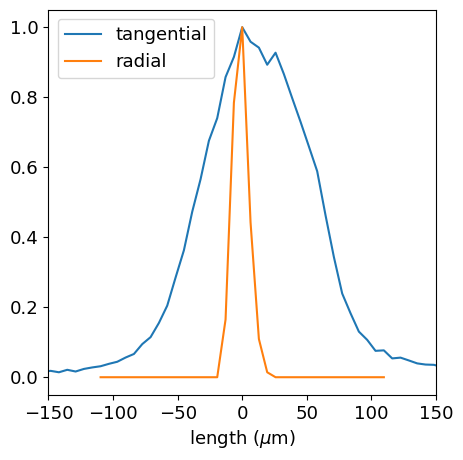

In [81]:
plt.figure(figsize=(5,5))
big_tangential = excel.iloc[:,10*4+2].dropna()
big_radial = excel.iloc[:,10*4+4].dropna()
plt.plot(range_from_profile(big_tangential), big_tangential/big_tangential.max(), label='tangential')
plt.plot(range_from_profile(big_radial), big_radial/big_radial.max(), label='radial')
plt.legend()
plt.xlim(-150, 150)

plt.xlabel('length ($\mu$m)')

In [36]:
4*12

48